In [1]:
import numpy as np
import tensorflow as tf
import scipy.io as sio
from tensorflow.random import set_seed
from ipywidgets import interact   #interactive plot
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [2]:
#######################################
#define the activation function
def rbf(x):
    return tf.math.exp(-x**2)

#######################################
#define the derivative of the activation function
def d_rbf(x):
    return tf.gradients(rbf,x)

#######################a################
#we couldn't use “tf_d_leaky_relu_6” as an activation function if we wanted to 
#because tensorflow doesn't know how to calculate the gradients of that function.
def rbf_grad(op, grad):
    x = op.inputs[0]
    n_gr = d_rbf(x)    #defining the gradient.
    return grad * n_gr

def py_func(func, inp, Tout, stateful=True, name=None, grad=None):
    # Need to generate a unique name to avoid duplicates:
    rnd_name = 'PyFuncGrad' + str(np.random.randint(0, 1E+2))
    tf.RegisterGradient(rnd_name)(grad)
    g = tf.get_default_graph()
    with g.gradient_override_map({"PyFunc": rnd_name, "PyFuncStateless": rnd_name}):
#     with g.gradient_override_map({"PyFunc": rnd_name}):
        return tf.py_func(func, inp, Tout, stateful=stateful, name=name)
    
def tf_rbf(x,name=None):
    with tf.name_scope(name, "rbf", [x]) as name:
        y = py_func(rbf,   #forward pass function
                    [x],
                    [tf.float32],
                    name=name,
                    grad= rbf_grad) #the function that overrides gradient
        y[0].set_shape(x.get_shape())     #when using with the code, it is used to specify the rank of the input.
    return y[0]

## 6.1 Feature Scaling and Data Preprocessing

In [3]:
a = 40
np.random.seed(1)
listex = np.linspace(-a,a,100)
listey = listex**2 + 0.1*np.random.normal(0, 1, len(listex)) 

set_seed(1)
model_rbf = tf.keras.Sequential()
model_rbf.add(tf.keras.layers.Dense(5,activation=rbf))
model_rbf.add(tf.keras.layers.Dense(1))
# model.metrics_names

model_rbf.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model_rbf.fit(listex,listey, epochs=1000, verbose=0)

# model.summary()
# model_rbf.get_weights()

set_seed(1)
model_relu = tf.keras.Sequential()
model_relu.add(tf.keras.layers.Dense(5,activation='relu'))
model_relu.add(tf.keras.layers.Dense(1))
# model.metrics_names

model_relu.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))
model_relu.fit(listex,listey, epochs=1500, verbose=0)

# model_relu.get_weights()

In [4]:
preds_rbf = []
# preds = []
preds_relu = []
size = 100
for j in np.linspace(-a,a,size):
    preds_rbf.append(model_rbf.predict([j]))
#     preds.append(model.predict([j]))
    preds_relu.append(model_relu.predict([j]))

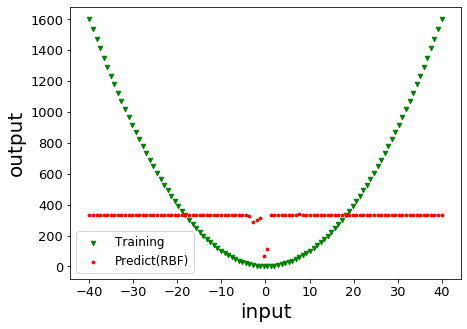

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.xlabel('input',fontsize=20)
plt.ylabel("output",fontsize=20)
plt.scatter(listex, listey, s=20, marker='v',color='g', label="Training")     #size of point
plt.scatter(np.linspace(-a,a,size), np.array(preds_rbf), s=10, marker='p', color='r', label="Predict(RBF)")
# plt.scatter(np.linspace(-a,a,size), preds, s=2, label="predictions")
# plt.scatter(np.linspace(-a,a,size), np.array(preds_relu), s=10, marker='s', color='blue', label="Predict(ReLU)")
plt.legend(prop={'size': 12});
# fig.savefig("NN_before_scale");

In [6]:
a = 40
np.random.seed(1)
listex2 = np.linspace(-1,1,200)
listey2 = ((a*listex2)**2 + 0.1*np.random.normal(0, 1, len(listex2)) )/a**2

set_seed(1)
model_rbf2 = tf.keras.Sequential()
model_rbf2.add(tf.keras.layers.Dense(5,activation=rbf))
model_rbf2.add(tf.keras.layers.Dense(1))

# model.metrics_names
model_rbf2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model_rbf2.fit(listex2,listey2, epochs=1000, verbose=0)

# model.summary()
# model_rbf2.get_weights()

set_seed(1)
model_relu2 = tf.keras.Sequential()
model_relu2.add(tf.keras.layers.Dense(5,activation='relu'))
model_relu2.add(tf.keras.layers.Dense(1))
# model.metrics_names

model_relu2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))
model_relu2.fit(listex2,listey2, epochs=1500, verbose=0)

# model_relu.get_weights()

In [7]:
preds_rbf2 = []
# preds = []
preds_relu2 = []
size = 100
x = np.linspace(-1,1,size)
for j in x:
    preds_rbf2.append(model_rbf2.predict([j]))
#     preds.append(model.predict([j]))
    preds_relu2.append(model_relu2.predict([j]))

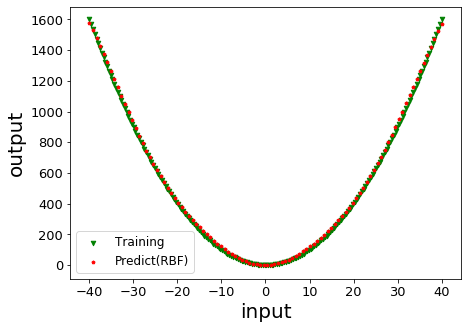

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.xlabel('input',fontsize=20)
plt.ylabel("output",fontsize=20)
plt.scatter(a*listex2, a**2*listey2, s=20, marker='v',color='g', label="Training")     #size of point
plt.scatter(np.linspace(-a,a,size), a**2*np.array(preds_rbf2), s=10, marker='p', color='r', label="Predict(RBF)")
# plt.scatter(np.linspace(-a,a,size), preds, s=2, label="predictions")
# plt.scatter(np.linspace(-a,a,size), a**2*np.array(preds_relu2), s=10, marker='s', color='blue', label="Predict(ReLU)")
plt.legend(prop={'size': 12});
# fig.savefig("NN_after_scale");

## 6.2 Architecture of the hidden layers

In [14]:
np.random.seed(12345)
x_act = np.pi*np.linspace(-1,1,200)
y_act = np.sin(x_act)+0.1*np.random.normal(0,1,len(x_act))
# listex3 = np.linspace(-1,1,100)
# listey3 = 1/(1+listex3**2)

In [19]:
## RBF ##
set_seed(12345)
model_rbf_act = tf.keras.Sequential()
model_rbf_act.add(tf.keras.layers.Dense(5,activation=rbf))
model_rbf_act.add(tf.keras.layers.Dense(1))
model_rbf_act.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model_rbf_act.fit(x_act,y_act, epochs=1000, verbose=0)

## ReLU ##
set_seed(12345)
model_relu_act = tf.keras.Sequential()
model_relu_act.add(tf.keras.layers.Dense(5,activation='relu'))
model_relu_act.add(tf.keras.layers.Dense(1))
model_relu_act.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))   #0.01:0.00333
model_relu_act.fit(x_act,y_act, epochs=1000, verbose=0)

## sigmoid ##
set_seed(12345)
model_sig_act = tf.keras.Sequential()
model_sig_act.add(tf.keras.layers.Dense(5,activation='sigmoid'))
model_sig_act.add(tf.keras.layers.Dense(1))
model_sig_act.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model_sig_act.fit(x_act,y_act, epochs=1000, verbose=0)

In [20]:
preds_rbf_act = []
preds_relu_act = []
preds_sig_act = []
size = 100
x_eval_act = np.pi*np.linspace(-1,1,size)
for j in x_eval_act:
    preds_rbf_act.append(model_rbf_act.predict([j]))
    preds_relu_act.append(model_relu_act.predict([j]))
    preds_sig_act.append(model_sig_act.predict([j]))

In [21]:
## RBF ##
p1 = tf.reshape(tf.constant(preds_rbf_act),len(preds_rbf_act))
error1 = tf.keras.losses.MSE(np.sin(x_eval_act),p1).numpy()

## ReLU ##
p2 = tf.reshape(tf.constant(preds_relu_act),len(preds_relu_act))
error2 = tf.keras.losses.MSE(np.sin(x_eval_act),p2).numpy()

## sigmoid ##
p3 = tf.reshape(tf.constant(preds_sig_act),len(preds_sig_act))
error3 = tf.keras.losses.MSE(np.sin(x_eval_act),p3).numpy()

print(error1, error2, error3)

0.0061783837 0.00690117 0.0023731194


### Activated neurons

Target function - (1)

$$
y = x^2
$$

##### Activation: ReLU

In [31]:
a = 40
np.random.seed(12345)
x_on1 = np.linspace(-1,1,100)
y_on1 = x_on1**2 + 0.1*np.random.normal(0, 1, len(x_on1)) 

num_neuron = 5
set_seed(12345)
model_relu_on = tf.keras.Sequential()
model_relu_on.add(tf.keras.layers.Dense(num_neuron,activation='relu'))
model_relu_on.add(tf.keras.layers.Dense(1))

model_relu_on.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))
model_relu_on.fit(x_on1,y_on1, epochs=1500, verbose=0)


weight_relu_on = model_relu_on.get_weights()
bdry_relu_on = []
bdry1_relu_on = []
for i in range(weight_relu_on[0].shape[1]):
    val = -weight_relu_on[1][i]/weight_relu_on[0][0,i]
    if weight_relu_on[0][0,i] >0:
        bdry_relu_on.append((val,i))    #bdry.append((val,i,'left'))
        bdry1_relu_on.append((val,i,'left'))     # left flat
    else:
        bdry_relu_on.append((val,i))    #bdry.append((val,i,'right'))
        bdry1_relu_on.append((val,i,'right'))
        
bdry_arr_relu_on = np.array(sorted(bdry_relu_on))

def piece(weight,i,x):
    b1 = weight[1][i]
    w1 = weight[0][0,i]
    val = tf.keras.activations.relu(w1*x+b1).numpy()
    return (weight[2][i])*val

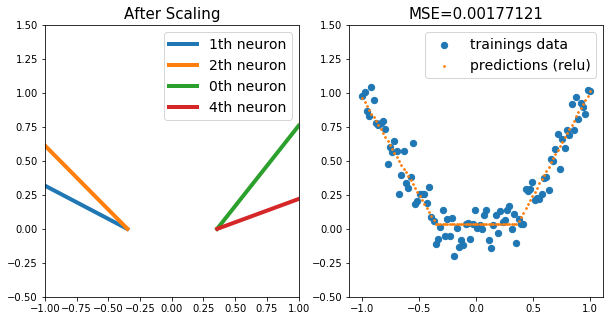

In [32]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
x_rb = 1
x_lb = -1
for i in map(int,bdry_arr_relu_on[:,1]):
    if bdry1_relu_on[i][-1] == 'left' and bdry1_relu_on[i][0]<x_rb: #activate part is in the interval
        x = np.linspace(bdry1_relu_on[i][0],x_rb,20)
        plt.plot(x, [piece(weight_relu_on,i,val) for val in x], label=str(i)+'th neuron', linewidth=4)
    elif bdry1_relu_on[i][-1] == 'right' and bdry1_relu_on[i][0]>x_lb:
        x = np.linspace(x_lb,bdry1_relu_on[i][0],20)
        plt.plot(x, [piece(weight_relu_on,i,val) for val in x], label=str(i)+'th neuron', linewidth=4)

plt.xlim(-1,1)
plt.ylim(-0.5,1.5)
plt.title('After Scaling',fontsize=15)
plt.legend(prop={'size': 14});
        
plt.subplot(122)
preds_relu_on = []
size = 100
for j in np.linspace(-1,1,size):
    preds_relu_on.append(model_relu_on.predict([j]))
p = tf.reshape(tf.constant(preds_relu_on),len(preds_relu_on))
error = tf.keras.losses.MSE(x_on1**2,p).numpy()
plt.ylim(-0.5,1.5)
plt.title('MSE=%.8f'%(error),fontsize=15)
plt.scatter(x_on1, y_on1, s=40, label="trainings data")     #size of point
plt.scatter(np.linspace(-1,1,size), np.array(preds_relu_on), s=3, label="predictions (relu)")
plt.legend(prop={'size': 14});
# fig.savefig("images/NN_Neurons_on_relu.png")

Target function - (1)

$$
y = x^2
$$

##### Activation: RBF

In [33]:
num_neuron = 5

set_seed(12345)
model_rbf_on = tf.keras.Sequential()
model_rbf_on.add(tf.keras.layers.Dense(num_neuron,activation=rbf))
model_rbf_on.add(tf.keras.layers.Dense(1))

model_rbf_on.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))
model_rbf_on.fit(x_on1,y_on1, epochs=1500, verbose=0)

weight_rbf_on = model_rbf_on.get_weights()
bdry_rbf_on = []

for i in range(weight_rbf_on[0].shape[1]):
    val1 = (-2-weight_rbf_on[1][i])/weight_rbf_on[0][0,i]
    val2 = (2-weight_rbf_on[1][i])/weight_rbf_on[0][0,i]
    bdry_rbf_on.append((min(val1,val2),max(val1,val2)))    

def overlap(interval1,interval2):
    if max(interval1[0],interval2[0]) < min(interval1[1],interval2[1]):
        return [max(interval1[0],interval2[0]), min(interval1[1],interval2[1])]
    else:
        return []
    
def piece_rbf(weight,i,x):
    b1 = weight[1][i]
    w1 = weight[0][0,i]
    val = rbf(w1*x+b1).numpy()
    return (weight[2][i])*val

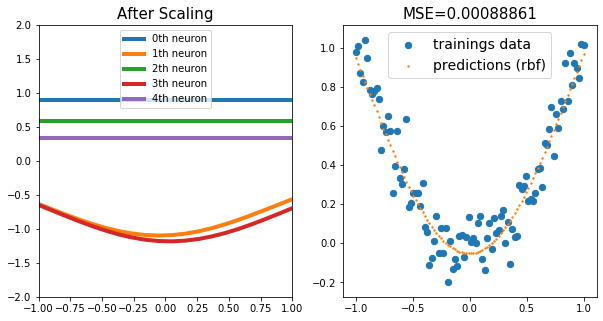

In [34]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
for i in range(num_neuron):
    interval = overlap([-1,1],bdry_rbf_on[i])
    if len(interval)!=0:
        x = np.linspace(interval[0],interval[1],20)
        plt.plot(x, [piece_rbf(weight_rbf_on,i,val) for val in x], label=str(i)+'th neuron',linewidth=4)
plt.xlim(-1,1)
plt.ylim(-2,2)
plt.title('After Scaling',fontsize=15)
plt.legend(prop={'size': 10}); 

plt.subplot(122)
preds_rbf_on = []
size = 100
for j in np.linspace(-1,1,size):
    preds_rbf_on.append(model_rbf_on.predict([j]))
p = tf.reshape(tf.constant(preds_rbf_on),len(preds_rbf_on))
error_rbf_on = tf.keras.losses.MSE(x_on1**2,p).numpy()
plt.title('MSE=%.8f'%(error_rbf_on),fontsize=15)
plt.scatter(x_on1, y_on1, s=40, label="trainings data")     #size of point
plt.scatter(np.linspace(-1,1,size), np.array(preds_rbf_on), s=2, label="predictions (rbf)")
plt.legend(prop={'size': 14});
# fig.savefig("images/NN_Neurons_on_rbf.png")

Target function - (2)

$$
y = \sin x
$$

##### Activation: ReLU

In [35]:
np.random.seed(12345)
x_on2 = np.linspace(-1,1,100)
# listey = listex**2 + 0.1*np.random.normal(0, 1, len(listex)) 
y_on2 = np.sin(np.pi*x_on2) + 0.1*np.random.normal(0, 1, len(x_on2)) 

In [36]:
num_neuron = 5
set_seed(12345)
model_relu_sin = tf.keras.Sequential()
model_relu_sin.add(tf.keras.layers.Dense(num_neuron,activation='relu'))
model_relu_sin.add(tf.keras.layers.Dense(1))

model_relu_sin.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))
model_relu_sin.fit(x_on2,y_on2, epochs=1500, verbose=0)

weight_sin = model_relu_sin.get_weights()
bdry_sin = []
bdry1_sin = []
for i in range(weight_sin[0].shape[1]):
    val = -weight_sin[1][i]/weight_sin[0][0,i]
    if weight_sin[0][0,i] >0:
        bdry_sin.append((val,i))    #bdry.append((val,i,'left'))
        bdry1_sin.append((val,i,'left'))     # left flat
    else:
        bdry_sin.append((val,i))    #bdry.append((val,i,'right'))
        bdry1_sin.append((val,i,'right'))
        
bdry_arr_sin = np.array(sorted(bdry_sin))

def piece(weight,i,x):
    b1 = weight[1][i]
    w1 = weight[0][0,i]
    val = tf.keras.activations.relu(w1*x+b1).numpy()
    return (weight[2][i])*val

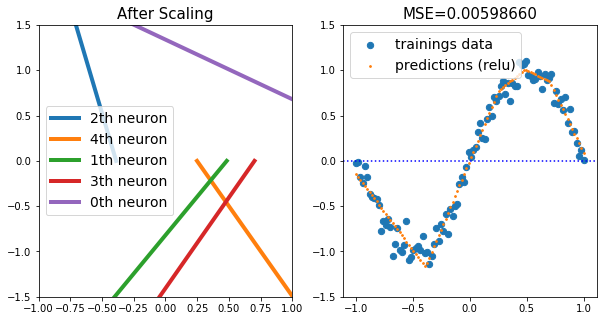

In [37]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
x_rb = 1
x_lb = -1
for i in map(int,bdry_arr_sin[:,1]):
    if bdry1_sin[i][-1] == 'left' and bdry1_sin[i][0]<x_rb: #activate part is in the interval
        x = np.linspace(bdry1_sin[i][0],x_rb,20)
        plt.plot(x, [piece(weight_sin,i,val) for val in x], label=str(i)+'th neuron', linewidth=4)
    elif bdry1_sin[i][-1] == 'right' and bdry1_sin[i][0]>x_lb:
        x = np.linspace(x_lb,bdry1_sin[i][0],20)
        plt.plot(x, [piece(weight_sin,i,val) for val in x], label=str(i)+'th neuron', linewidth=4)

plt.xlim(-1,1)
plt.ylim(-1.5,1.5)
plt.title('After Scaling',fontsize=15)
plt.legend(prop={'size': 14});


plt.subplot(122)
preds_relu_sin = []
size = 100
for j in np.linspace(-1,1,size):
    preds_relu_sin.append(model_relu_sin.predict([j]))
p = tf.reshape(tf.constant(preds_relu_sin),len(preds_relu_sin))
error = tf.keras.losses.MSE(np.sin(np.pi*x_on2),p).numpy()
plt.title('MSE=%.8f'%(error),fontsize=15)
plt.axhline(0,c='b',linestyle=':')
plt.ylim(-1.5,1.5)
plt.scatter(x_on2, y_on2, s=40, label="trainings data")     #size of point
plt.scatter(np.linspace(-1,1,size), np.array(preds_relu_sin), s=3, label="predictions (relu)")
plt.legend(prop={'size': 14});
# fig.savefig("images/NN_Neurons_on_sin_relu.png")

Target function - (2)

$$
y = \sin x
$$

##### Activation: RBF

In [38]:
set_seed(12345)
model_rbf_sin = tf.keras.Sequential()
model_rbf_sin.add(tf.keras.layers.Dense(2,activation=rbf))
model_rbf_sin.add(tf.keras.layers.Dense(1))

model_rbf_sin.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))
model_rbf_sin.fit(x_on2,y_on2, epochs=1500, verbose=0)

weight_rbf_sin = model_rbf_sin.get_weights()
bdry_sin = []

for i in range(weight_rbf_sin[0].shape[1]):
    val1 = (-2-weight_rbf_sin[1][i])/weight_rbf_sin[0][0,i]
    val2 = (2-weight_rbf_sin[1][i])/weight_rbf_sin[0][0,i]
    bdry_sin.append((min(val1,val2),max(val1,val2)))    #bdry.append((val,i,'left'))

def overlap(interval1,interval2):
    if max(interval1[0],interval2[0]) < min(interval1[1],interval2[1]):
        return [max(interval1[0],interval2[0]), min(interval1[1],interval2[1])]
    else:
        return []
    
def piece_rbf(weight,i,x):
    b1 = weight[1][i]
    w1 = weight[0][0,i]
    val = rbf(w1*x+b1).numpy()
    return (weight[2][i])*val

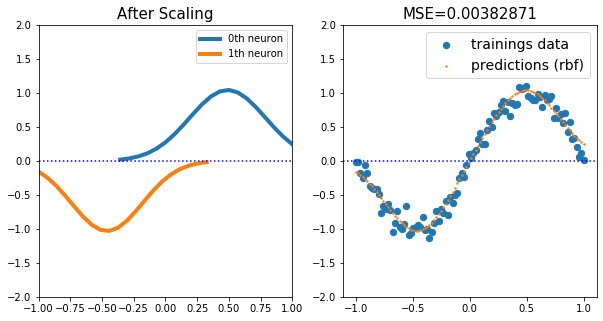

In [39]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
for i in range(2):
    interval = overlap([-1,1],bdry_sin[i])
    if len(interval)!=0:
        x = np.linspace(interval[0],interval[1],20)
        plt.plot(x, [piece_rbf(weight_rbf_sin,i,val) for val in x], label=str(i)+'th neuron',linewidth=4)
plt.xlim(-1,1)
plt.ylim(-2,2)
plt.axhline(0,c='b',linestyle=':')
plt.title('After Scaling',fontsize=15)
plt.legend(prop={'size': 10}); 

plt.subplot(122)
preds_rbf_sin = []
size = 100
for j in np.linspace(-1,1,size):
    preds_rbf_sin.append(model_rbf_sin.predict([j]))
p = tf.reshape(tf.constant(preds_rbf_sin),len(preds_rbf_sin))
error = tf.keras.losses.MSE(np.sin(np.pi*x_on2),p).numpy()
plt.title('MSE=%.8f'%(error),fontsize=15)
plt.axhline(0,c='b',linestyle=':')
plt.scatter(x_on2, y_on2, s=40, label="trainings data")     #size of point
plt.scatter(np.linspace(-1,1,size), np.array(preds_rbf_sin), s=2, label="predictions (rbf)")
plt.ylim(-2,2)
plt.legend(prop={'size': 14});
# fig.savefig("images/NN_Neurons_on_sin_rbf.png")

### Cross-validation

